<a href="https://colab.research.google.com/github/Farzana34/iFeature/blob/master/Credit_card_fruad_ditection_smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install smote-variants

     |████████████████████████████████| 143kB 5.3MB/s 
  Created wheel for statistics: filename=statistics-1.0.3.5-cp36-none-any.whl size=7454 sha256=06ca046f5bc303ef3a5546ba8e484d38cf09d5ab63f00fe0d28d05dc5ab6b933
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=29d77bad5f90651e570e250919800e475c79a10cb0b337eac35c590a0b02acc4
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built statistics minisom


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import smote_variants as sv
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [3]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
import io
import pandas as pd


dataset= pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

# **Without smote**

In [5]:
X= dataset.iloc[:, 0:30].values
y = dataset.iloc[:, 30].values

majority class: 284315
minority class: 492


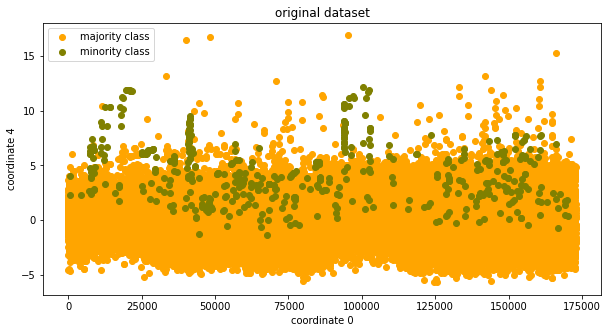

In [8]:

plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:,0], X[y == 0][:,4], label='majority class', c='orange')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], label='minority class', c='olive')
plt.title('original dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.legend()

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


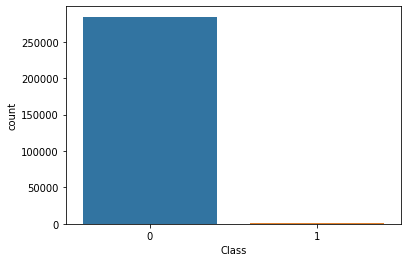

In [ ]:
import seaborn as sns
sns.countplot(dataset['Class'])

In [ ]:

print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 284315
minority class: 492


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

Accuracy: 
99.30128857835048
[[56502   362]
 [   36    62]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.63      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962

10 fold cross validation
99.26406325141264
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.14      0.64      0.23       492

    accuracy                           0.99    284807
   macro avg       0.57      0.82      0.61    284807
weighted avg       1.00      0.99      0.99    284807



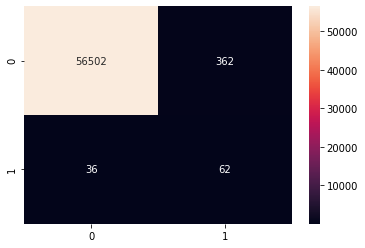

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb, X, y, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb, X, y, cv=10)
print(classification_report(y,predictions))

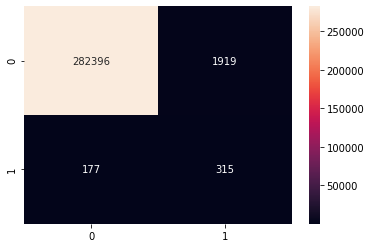

In [ ]:
sns.heatmap(confusion_matrix(y,predictions),annot=True,fmt="0.0f")

In [ ]:
from sklearn.metrics import roc_curve, auc

nb1_fpr, nb1_tpr, threshold = roc_curve(y_test, y_pred)
auc_withoutsmote = auc(nb1_fpr, nb1_tpr)

nb11_fpr, nb11_tpr, threshold = roc_curve(y,predictions)
auc_withoutsmote_cross = auc(nb11_fpr, nb11_tpr)

# **With smote**

In [ ]:
import smote_variants as sv
oversampler= sv.SMOTE()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-15 17:55:27,245:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 17:55:28,271:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 17:55:29,101:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 283823


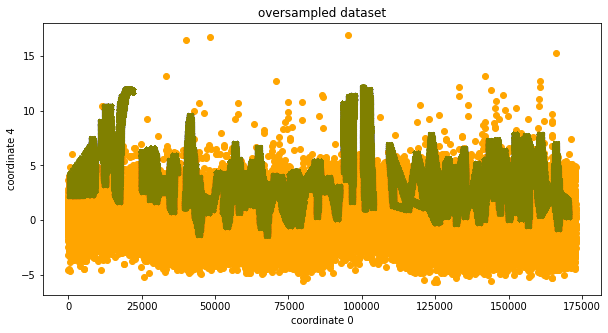

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,4], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


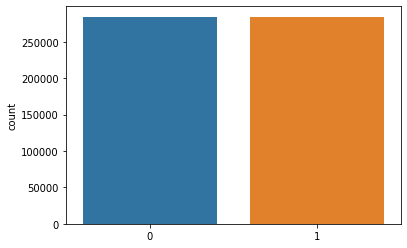

In [ ]:
sns.countplot(y_oversample)

Accuracy: 
99.22755521224677
[[56453   411]
 [   29    69]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.70      0.24        98

    accuracy                           0.99     56962
   macro avg       0.57      0.85      0.62     56962
weighted avg       1.00      0.99      0.99     56962

10 fold cross validation
86.71033888468776
              precision    recall  f1-score   support

           0       0.79      0.99      0.88    284315
           1       0.99      0.74      0.85    284315

    accuracy                           0.87    568630
   macro avg       0.89      0.87      0.86    568630
weighted avg       0.89      0.87      0.86    568630



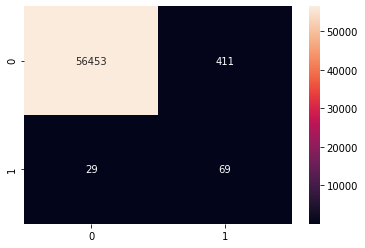

In [ ]:
nb1 = GaussianNB()
nb1.fit(Xtrain_oversample, ytrain_oversample)
y_pred=nb1.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X_oversample, y_oversample, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

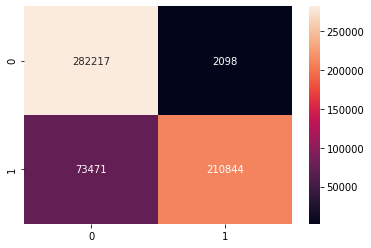

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

In [ ]:
from sklearn.metrics import roc_curve, auc

nb2_fpr, nb2_tpr, threshold = roc_curve(y_test, y_pred)
auc_withsmote = auc(nb2_fpr, nb2_tpr)

nb22_fpr, nb22_tpr, threshold = roc_curve(y_oversample,predictions)
auc_withsmote_cross = auc(nb22_fpr, nb22_tpr)

# **With smote veriant**

In [ ]:
import smote_variants as sv
oversampler= sv.Borderline_SMOTE1()
X_samp, y_samp= oversampler.sample(X, y)
Xtrain_oversample, ytrain_oversample = oversampler.fit_resample(X_train, y_train)
X_oversample, y_oversample = oversampler.fit_resample(X, y)

2020-11-15 17:56:40,328:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 18:00:28,565:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1, 'random_state': None}")
2020-11-15 18:00:31,766:INFO:Borderline_SMOTE1: Running sampling via ('Borderline_SMOTE1', "{'proportion': 1.0, 'n_neighbors': 5, 'k_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [ ]:
oversamplers= sv.get_all_oversamplers()

In [ ]:
X_samp, y_samp= X_samp[len(X):], y_samp[len(y):]

print('majority new samples: %d' % np.sum(y_samp == 0))
print('minority new samples: %d' % np.sum(y_samp == 1))

majority new samples: 0
minority new samples: 283823


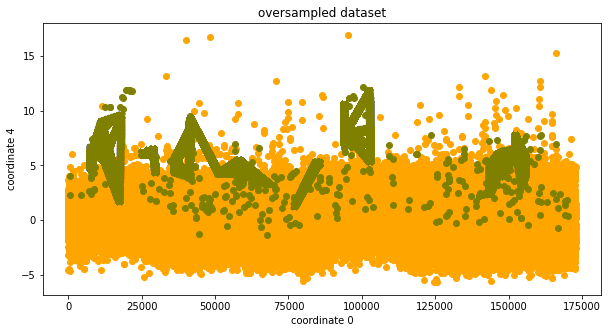

In [ ]:

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:,0], X[y == 0][:,4], c='orange',label='minority class')
plt.scatter(X[y == 1][:,0], X[y == 1][:,4], c='olive', label='majority class')
plt.scatter(X_samp[y_samp == 1][:,0], X_samp[y_samp == 1][:,4], label='new minority samples', c='olive', marker='x')
plt.title('oversampled dataset')
plt.xlabel('coordinate 0')
plt.ylabel('coordinate 4')
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


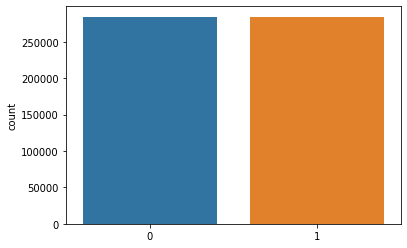

In [ ]:
sns.countplot(y_oversample)

Accuracy: 
99.63484428215301
[[56694   170]
 [   38    60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.61      0.37        98

    accuracy                           1.00     56962
   macro avg       0.63      0.80      0.68     56962
weighted avg       1.00      1.00      1.00     56962

10 fold cross validation
96.82728663630128
              precision    recall  f1-score   support

           0       0.94      1.00      0.97    284315
           1       1.00      0.94      0.97    284315

    accuracy                           0.97    568630
   macro avg       0.97      0.97      0.97    568630
weighted avg       0.97      0.97      0.97    568630



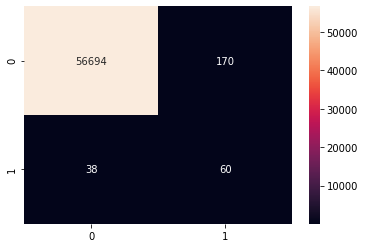

In [ ]:
nb1 = GaussianNB()
nb1.fit(Xtrain_oversample, ytrain_oversample)
y_pred=nb1.predict(X_test)
print("Accuracy: ")
print(accuracy_score(y_pred, y_test)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="0.0f")
print("10 fold cross validation")
nb2 = cross_val_score(nb1, X_oversample, y_oversample, cv=10)
print(nb2.mean()*100)
predictions = cross_val_predict(nb1, X_oversample, y_oversample, cv=10)
print(classification_report(y_oversample,predictions))

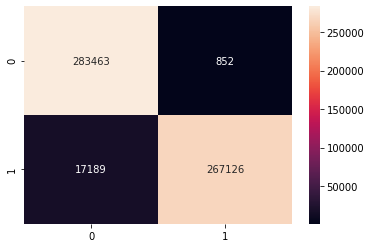

In [ ]:
sns.heatmap(confusion_matrix(y_oversample,predictions),annot=True,fmt="0.0f")

In [ ]:
from sklearn.metrics import roc_curve, auc

nb3_fpr, nb3_tpr, threshold = roc_curve(y_test, y_pred)
auc_withsmotevarient = auc(nb3_fpr, nb3_tpr)

nb33_fpr, nb33_tpr, threshold = roc_curve(y_oversample,predictions)
auc_withsmotevarient_cross = auc(nb33_fpr, nb33_tpr)

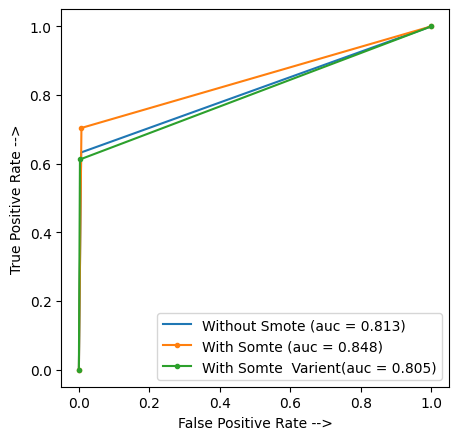

In [ ]:

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nb1_fpr, nb1_tpr, linestyle='-', label='Without Smote (auc = %0.3f)' % auc_withoutsmote)
plt.plot(nb2_fpr, nb2_tpr, marker='.', label='With Somte (auc = %0.3f)' % auc_withsmote)
plt.plot(nb3_fpr, nb3_tpr, marker='.', label='With Somte  Varient(auc = %0.3f)' % auc_withsmotevarient)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

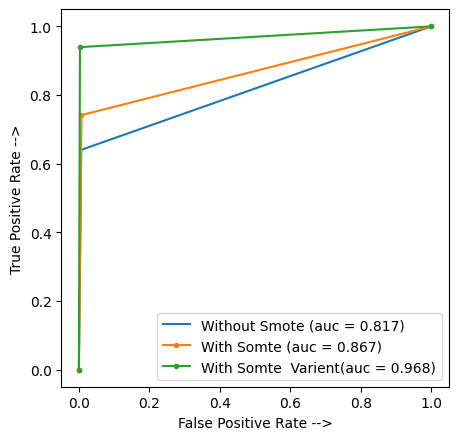

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(nb11_fpr, nb11_tpr, linestyle='-', label='Without Smote (auc = %0.3f)' % auc_withoutsmote_cross)
plt.plot(nb22_fpr, nb22_tpr, marker='.', label='With Somte (auc = %0.3f)' % auc_withsmote_cross)
plt.plot(nb33_fpr, nb33_tpr, marker='.', label='With Somte  Varient(auc = %0.3f)' % auc_withsmotevarient_cross)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()